# Yemko Pryor IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [15]:
%reload_ext watermark
%watermark -a "Yemko Pryor" -d

Yemko Pryor 2020-02-14


#### Load libraries

In [3]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
from matplotlib import pyplot as plt

#### Load data
note: include test for this chunk from previous homework

In [5]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")
len(counts.columns) == 14

True

#### Prepare data for PCA Analysis

In [6]:
counts_transpose = counts.T
len(counts_transpose) == 14
group = ["Control", "Control","Control","Control","Control","Control","Control", 
         "Cases","Cases","Cases","Cases","Cases","Cases","Cases"]
counts_transpose["group"] = group
random.seed(60643)
features = pd.Series(counts_transpose.columns)[0:14944]
feature_array = counts_transpose.loc[:, features].values
target_array = counts_transpose.loc[:, ["group"]].values
fitted_features = StandardScaler().fit_transform(feature_array)

#### Determine Principal Components
note: include test for this chunk from previous homework

In [7]:
pca = PCA(n_components = 2)
pComponents = pca.fit_transform(fitted_features)
pDataframe = pd.DataFrame(data = pComponents, columns = ["PC1", "PC2"])
pDataframe.index = counts_transpose.index
targetDataframe = counts_transpose[["group"]]
newDataframe = pd.concat([pDataframe, targetDataframe], axis = 1)


#### Graph the principal components by sample group

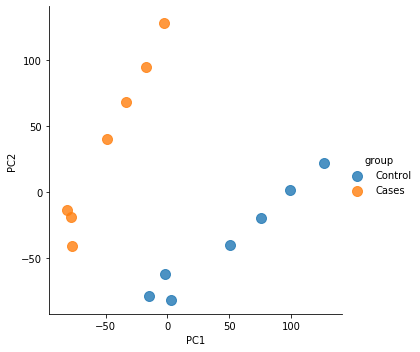

In [10]:
sns.lmplot (x= "PC1", y = "PC2", data = newDataframe, fit_reg = False, hue = "group", legend = True,
           scatter_kws = {"s":100})

#### Interpret the graph for your principal investigator using explained variance

In [11]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Aproximately 39% of the variability between these sample groups is explained by a sample being either a case or a control. Approximately 37% can be attributed to another variable unaccounted for in the experimental design.

#### My plot

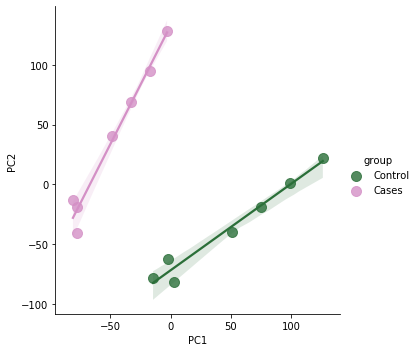

In [13]:
sns.lmplot (x= "PC1", y = "PC2", data = newDataframe, fit_reg = True, hue = "group", legend = True, 
            palette = "cubehelix", scatter_kws = {"s":100})

#### Report Session Information


In [16]:
sinfo()

-----
matplotlib  3.1.3
numpy       1.18.1
pandas      1.0.1
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.12.0
jupyter_client      5.3.4
jupyter_core        4.6.1
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 16:15:59) [Clang 4.0.1 (tags/RELEASE_401/final)]
macOS-10.15.2-x86_64-i386-64bit
4 logical CPU cores, i386
-----
Session information updated at 2020-02-14 11:48
